# Regularization

### Introduction

In [4]:
library(ggplot2)
library(gridExtra)
library(glmnet)
library(grid)
library(reshape)

Loading required package: Matrix

Loaded glmnet 4.0


Attaching package: 'reshape'


The following object is masked from 'package:Matrix':

    expand




In [11]:
births <- read.csv('Datasets/Births.csv')
head(births) 

,ï..Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1977,78173,4381,35069,19086,20981,6739,59602,2923
2,1978,78190,4342,35054,18964,21094,6751,59364,2600
3,1979,77669,4217,34858,18403,20523,6947,58006,2747
4,1980,78859,4181,34666,18317,20354,6660,57768,2859
5,1981,80980,4193,37545,18960,21277,7112,58104,2749
6,1982,82185,4120,39403,19076,22236,7140,59842,3074


Create a total column

In [12]:
births[, 'Total'] <- rowSums((births[, 2:9]))
colnames(births)[1] <- "Year"

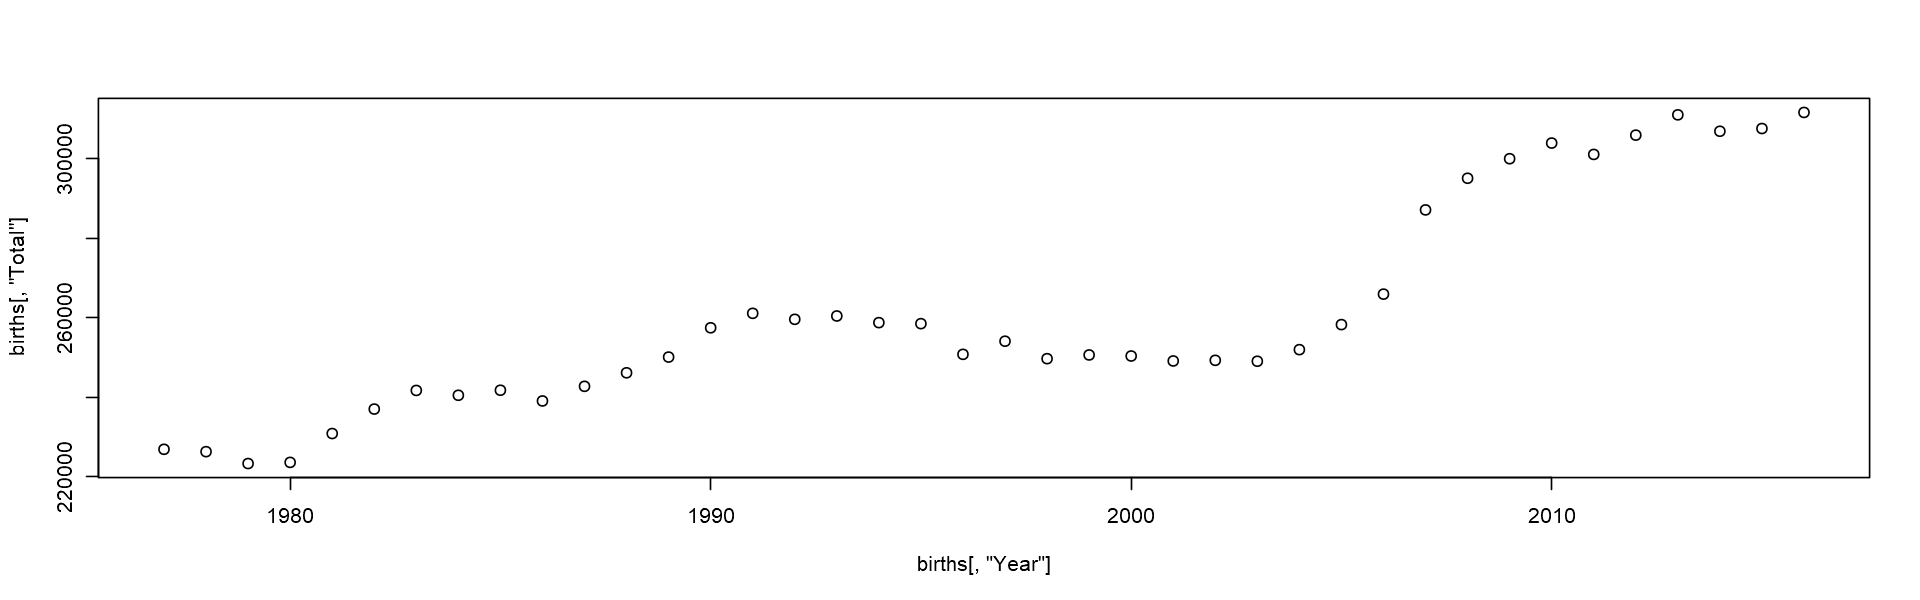

In [13]:
plot(births[, 'Year'], births[, 'Total'])

### Fitting Regressions

In [14]:
Y <- births[, 'Total']
X <- births[, 'Year']

overfit_model <- lm(Y ~ poly(X,20))
model <- lm(Y ~ poly(X,4))
underfit_model <- lm(Y ~ poly(X,1))

A <- predict(underfit_model)
B <- predict(model)
C <- predict(overfit_model)

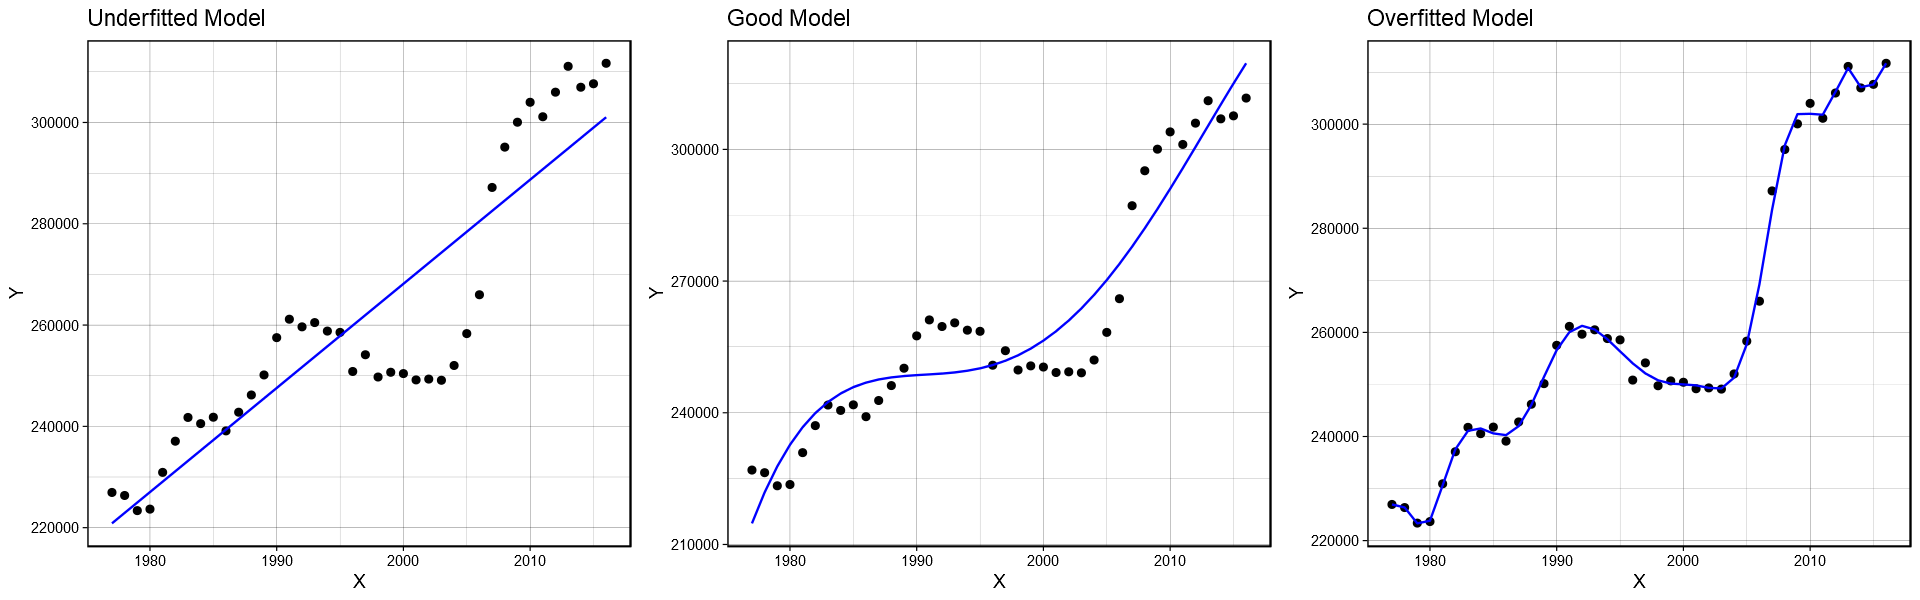

In [15]:
options(repr.plot.width=16, repr.plot.height=5) # area of display

plot1 <- ggplot(births, aes(x = X, y = Y)) + geom_point() + 
theme_linedraw() + 
ggtitle("Underfitted Model") + geom_line(color='blue', data = births, aes(x=X, y=A))

plot2 <- ggplot(births, aes(x = X, y = Y)) + geom_point() + 
theme_linedraw() + 
ggtitle("Good Model") +  geom_line(color='blue', data = births, aes(x=X, y=B))

plot3 <- ggplot(births, aes(x = X, y = Y)) + geom_point() + 
theme_linedraw() + 
ggtitle("Overfitted Model") +  geom_line(color='blue', data = births, aes(x=X, y=C))

grid.arrange(plot1, plot2, plot3, nrow = 1) # display of first plot

#### Regularize Polynomial Regression

In [23]:
x <- model.matrix(Year ~ poly(Year, 10), data = births)
model <- cv.glmnet(y = Year,
                   x = x,
                   alpha = 0,
                   family = "multinomial",
                   lambda.min.ratio = 1e-6) #changed it from the default since it looked the optimum is lower then the min lambda tried

plot(model)

ERROR: Error in drop(y): object 'Year' not found


In [24]:
births

Year,NSW,ACT,QLD,SA,WA,TAS,VIC,NT,Total
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>
1977,78173,4381,35069,19086,20981,6739,59602,2923,226954
1978,78190,4342,35054,18964,21094,6751,59364,2600,226359
1979,77669,4217,34858,18403,20523,6947,58006,2747,223370
1980,78859,4181,34666,18317,20354,6660,57768,2859,223664
1981,80980,4193,37545,18960,21277,7112,58104,2749,230920
1982,82185,4120,39403,19076,22236,7140,59842,3074,237076
1983,84180,4081,41863,19445,22442,6994,59768,2991,241764
1984,82541,4155,40815,20118,22463,7106,60143,3203,240544
1985,83812,4056,40257,19901,22967,7232,60515,3074,241814



We define the error function for the regression with regularization as:

$E(\omega) =  \frac{1}{2} \sum_{n=1}^{N} (t_n - w\phi(x_n))^2 + \frac{\lambda}{2} \sum_{j=0}^{M-1}\omega_j^{2}$

The gradient here is: 

$\triangledown E(\omega) = \sum_{n=1}^{N} (t_n - \omega\phi(x_n))^2 \phi(x_n) + \lambda \omega$

We need to proceed with the following steps

1. initialize weight vector $\omega$ with chosen starting values and define a learning rate $\eta$ and termination thresold $\epsilon$ 
2. Repeat the following until the difference between the old and the new weight vectors becomes small (ie, d($\omega_{\tau+1}, \omega_{\tau}) \leq \epsilon$ 
A. Shuffle the trainning data 
B. For each data point in the trainning data do:
$\omega_{\tau+1} := \omega(\tau) + \eta(t - \omega(\tau) \phi\eta)\phi_\eta + \eta\lambda\omega$


<br>
<br>
<br>


# Artificial Dataset

In [58]:
set.seed(1)

In [130]:
x1 <- rnorm(100, 10)
x2 <- 2*x1 + rnorm(100, 10)
x3 <- 5*x1 + rnorm(100, 55)
eps <- rnorm(100, 100, 100)

b0 <- 2
b1 <- 30
b2 <- -10
b3 <- 5

X1 <-  b1 * x1 
X2 <-  b1 * x2 
X3 <-  b1 * x3 

Y <- b0 + X1 + X2 + X3 + eps

In [152]:
# Generate data
set.seed(19875)  # Set seed for reproducibility
n <- 1000  # Number of observations
p <- 5  # Number of predictors included in model
real_p <- 5  # Number of true predictors
x <- matrix(rnorm(n*p), nrow=n, ncol=p)
y <- apply(x[,1:real_p], 1, sum) + rnorm(n)

# Split data into train (2/3) and test (1/3) sets
train_rows <- sample(1:n, .66*n)
x.train <- x[train_rows, ]
x.test <- x[-train_rows, ]

y.train <- y[train_rows]
y.test <- y[-train_rows]

In [153]:
df <- data.frame(x)

In [154]:
Davis <- data.frame("X1" = df$X1, "X2" = df$X2, "X3" = df$X3, "Y" = y)

In [155]:
train.index <- sample(1:nrow(Davis),900)
train.data <- Davis[train.index, c('X1', 'X2', 'X3')]
train.label <- Davis[train.index, 'Y']
test.data <- Davis[-train.index, c('X1', 'X2', 'X3')]
test.label <- Davis[-train.index, 'Y']

In [156]:
fitAndPlot <- function(train.data, train.label, alpha=0, lambda = c(0:5000)/1000){
    # fit the model
    fit <- glmnet(x = as.matrix(train.data), y=train.label, alpha = alpha, lambda = lambda)

    # aggrigate the outputs
    out <- as.data.frame(as.matrix(t(fit$beta)))
    out[,c('nonzero', 'lambda')] <- c(fit$df, fit$lambda)

    # reshape the outputs (for plotting)
    out.m<-melt(out, id=c('lambda', 'nonzero'))
    names(out.m) <- c('lambda', 'nonzero', 'feature', 'coefficient')

    # plot coefficients vs lambda 
    g <- ggplot(data = out.m, aes(x=log(lambda), y=coefficient, color=factor(feature))) + geom_line() +
        ggtitle('Coefficients vs. lambda') + theme_minimal()
    print(g)
    
#     # plot number of nonzero coefficients (as ameasure of model complexity) vs lambda 
#     g <- ggplot(data = out.m, aes(x=log(lambda), y=nonzero)) + geom_line() + 
#        scale_color_discrete(guide = guide_legend(title = NULL)) + 
#        ggtitle('Nonzero Coefficients vs. lambda') + theme_minimal()
#     print(g)
    
    # run the predictions
    train.predict <- predict(fit, newx=as.matrix(train.data))
    test.predict <- predict(fit, newx=as.matrix(test.data))

    # calculate the standard errors
    error <- data.frame('lambda' = out$lambda, 
                    'train' = sqrt(colSums((train.predict - train.label)^2)/nrow(train.predict)),
                    'test' = sqrt(colSums((test.predict - test.label)^2)/nrow(test.predict)))
    error.m <- melt(error, id='lambda')
    names(error.m) <- c('lambda', 'set', 'SE')

    # plot sum of squarred error for train and test sets vs lambda 
    g <- ggplot(data = error.m, aes(x= log(lambda), y = SE, color = factor(set))) + geom_line() +  ylim(0,6) +
        scale_color_discrete(guide = guide_legend(title = NULL)) + 
        ggtitle('Sum of squarred errors vs. lambda') + theme_minimal()
    print(g)
}

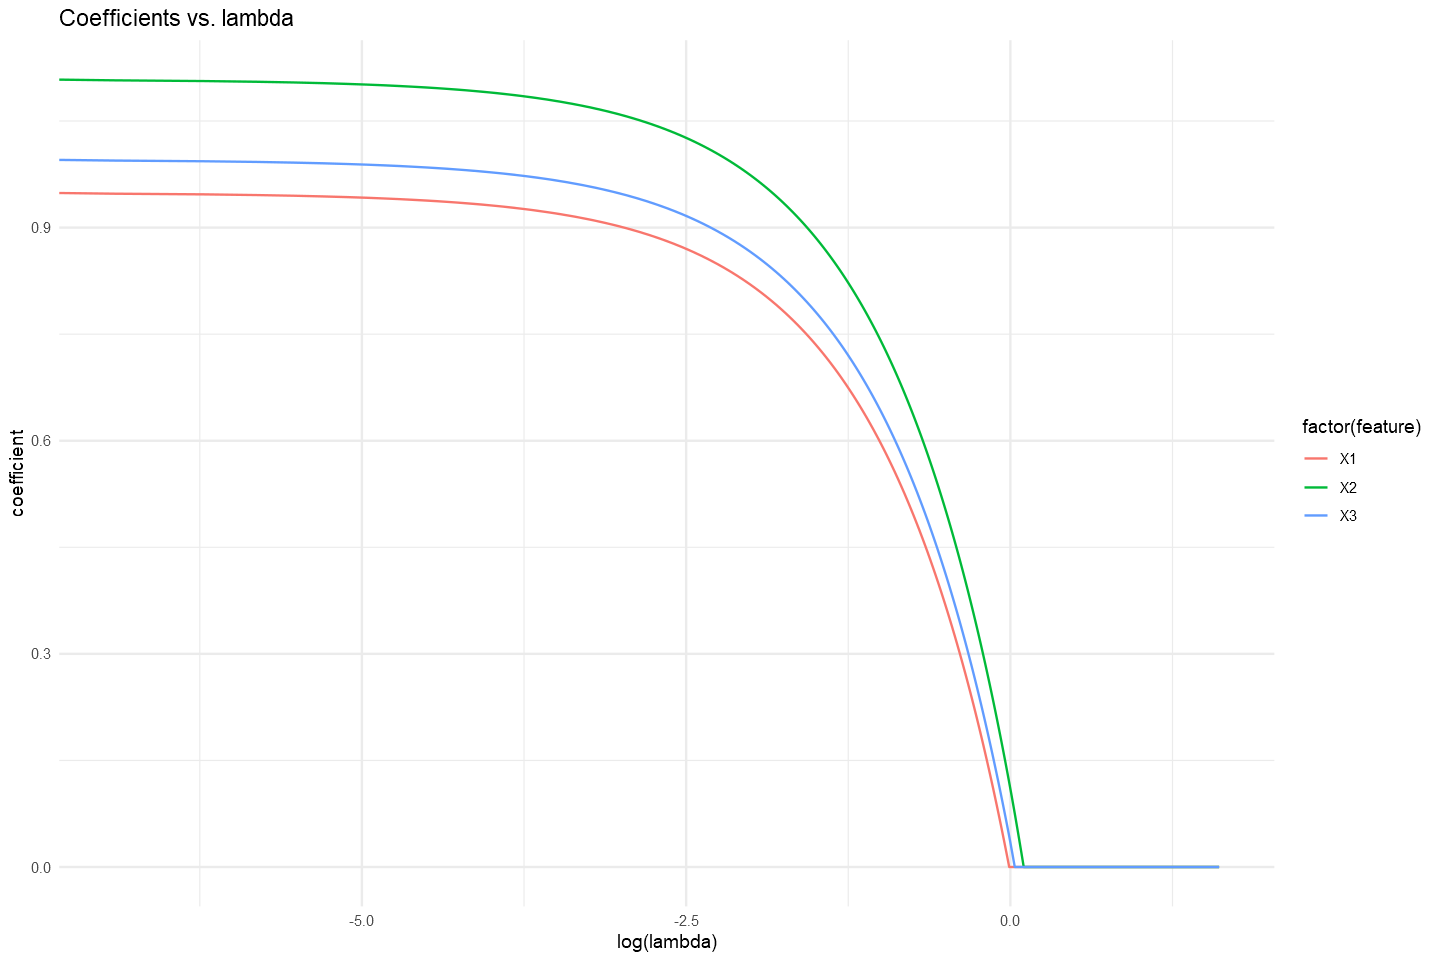

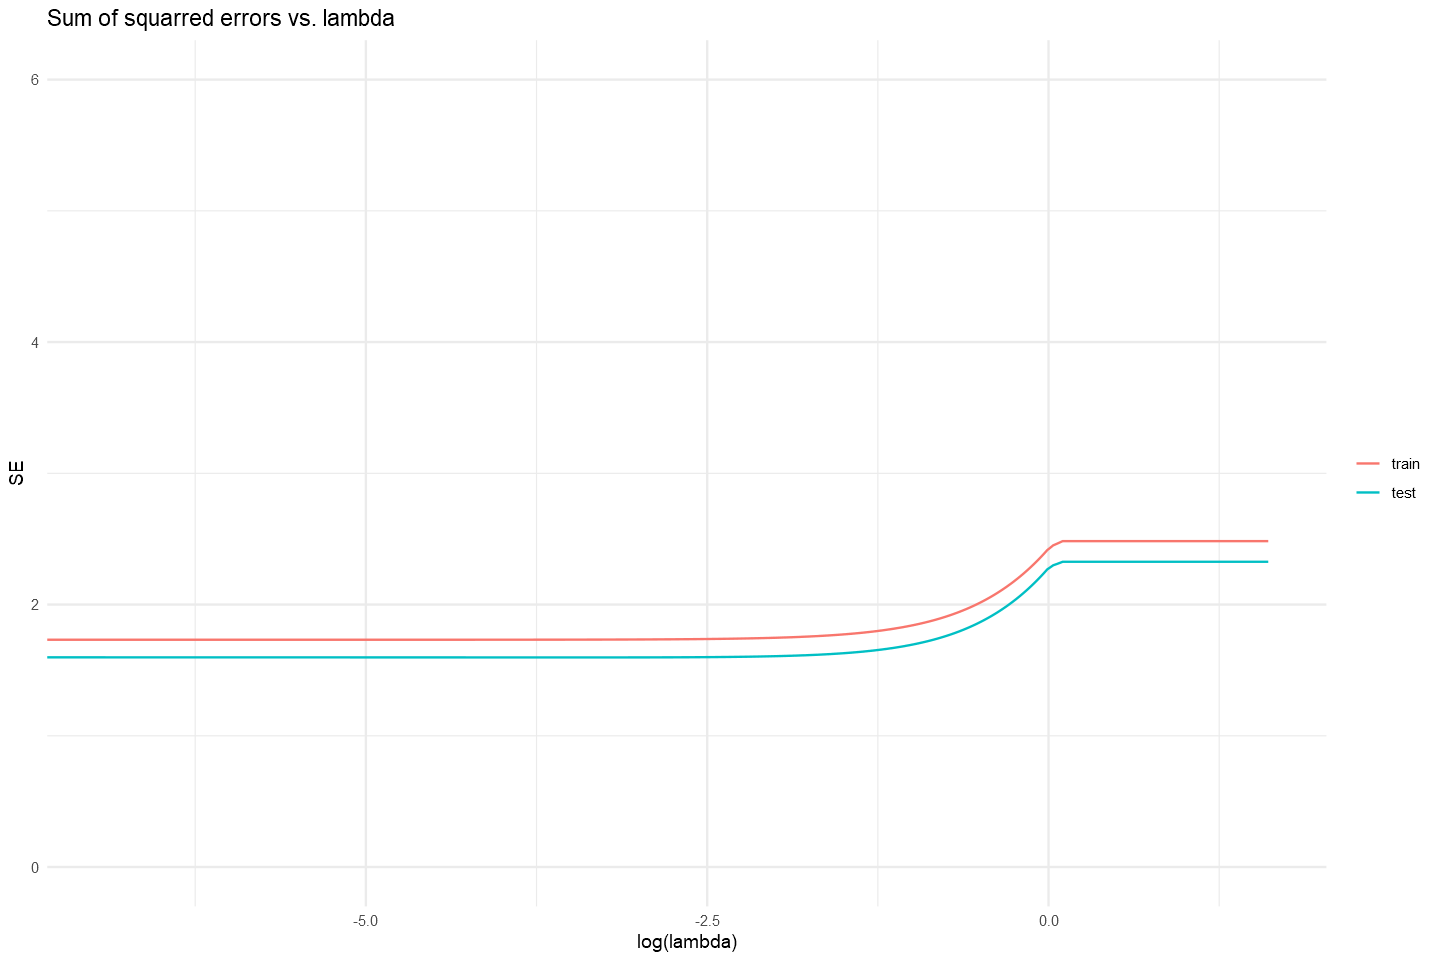

In [157]:
options(repr.plot.width=12, repr.plot.height=8) # area of display

fitAndPlot (train.data, train.label, alpha=1, lambda = c(0:5000)/1000)

In [158]:
fit <- glmnet(x = as.matrix(train.data), y=train.label,  alpha=1, lambda = c(0:5000)/1000)

# aggrigate the outputs
out <- as.data.frame(as.matrix(t(fit$beta)))
out[,c('nonzero', 'lambda')] <- c(fit$df, fit$lambda)
out

,X1,X2,X3,nonzero,lambda
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s0,0,0,0,0,5.000
s1,0,0,0,0,4.999
s2,0,0,0,0,4.998
s3,0,0,0,0,4.997
s4,0,0,0,0,4.996
s5,0,0,0,0,4.995
s6,0,0,0,0,4.994
s7,0,0,0,0,4.993
s8,0,0,0,0,4.992


# Ridge and Lasso Regression on the Soccer Dataset


We will now work with the Soccer Players Statistics [dataset](https://www.kaggle.com/antoinekrajnc/soccer-players-statistics) organized by [antoinekrajnc](https://www.kaggle.com/antoinekrajnc). The data comes originally from the game FIFA.

This dataset contains information about more than 15,000 soccer players. We want to predict the overall rating of each soccer player based on other features such as Ball_Control, Dribbling, Marking and so on and so forth. 

There are more than 30 attribures and we want to know what are the most relevant features to predict the rating of a soccer player on the game FIFA. 

We will perform an analysis using `glmnet`, which is a standard library to perform regressions such as ridge regression, lasso and ElasticNet.It has a different syntax than the traditional `lm`.Important remarks about the library are:
- We must pass in an x matrix as well as a y vector.
- Important: Make sure that there are no missing values in the data or the code won't run.

#### Importing the Data

In [27]:
soccer <- read.csv('Datasets/Soccer.csv', encoding = 'UTF-8') # import file
soccer<- soccer[!duplicated(soccer[1]),] # eliminate duplicates
rownames(soccer) <- soccer$Name # define player name as rowname 
soccer <- soccer[,c(-1, -2, -3)] # clean table from unwanted columns

In [28]:
# dimensions
dim(soccer)

[1] 16733    30

We are working with a large dataset, 16733 rows. <br>
However, if we want to explore overfitting, we must make the data overfit. When data is too large it will likely not overfit. So for our experiment, we will extract a sample of `n = 300` rows. You are encouraged to try other numbers and explore the behaviour of the analysis. 

In [29]:
set.seed(200) # seed
n = 300
soccer <- soccer[sample(nrow(soccer), n),] #

In [30]:
head(soccer)

,Rating,Ball_Control,Dribbling,Marking,Sliding_Tackle,Standing_Tackle,Aggression,Reactions,Attacking_Position,Interceptions,...,Agility,Jumping,Heading,Shot_Power,Finishing,Long_Shots,Curve,Freekick_Accuracy,Penalties,Volleys
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,...,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
Konstantin Rausch,74,72,72,67,64,68,74,74,67,73,...,75,74,57,74,62,71,75,76,66,61
Robin Šimović,69,67,59,16,13,11,53,57,68,18,...,48,31,72,74,71,55,58,59,61,61
Majed Al Marshadi,69,43,34,65,63,67,80,66,22,67,...,63,83,71,46,16,31,19,34,33,21
Fabio Castellano,61,62,60,44,50,51,52,59,61,44,...,52,56,55,53,43,53,44,42,42,46
Ville Jalasto,64,59,48,66,64,66,74,62,45,68,...,45,75,65,68,42,27,24,39,45,43
Jerdy Schouten,59,56,57,15,18,15,27,55,48,18,...,66,55,54,65,65,64,34,33,63,49


The `model.matrix()` function is particularly useful for creating x; not only does it produce a matrix corresponding to the all predictors but it also automatically transforms any qualitative variables into dummy variables. The latter property is important because glmnet() can only take numerical, quantitative inputs.

In [31]:
x = model.matrix(Rating ~ .,soccer)[,-1]
y = soccer$Rating
y = y[!is.na(y)]

#### Ridge Regression
The `glmnet()` function has an alpha argument that determines what type of model is fit. If `alpha=0` then a **ridge** regression model is fit, and if `alpha=1` then a **lasso** model is fit. We first fit a ridge regression model.

In [58]:
lambda = seq (0.5,50.5, length =100) # vector of lambdas
ridge.mod = glmnet(x, y, alpha = 0, lambda = lambda)

By default the glmnet() function performs ridge regression for an automatically selected range of `λ` values. 
Nevertheless, we have chosen to implement with a range from  `λ = 0 to λ = 50`. 

- Essentially we cover the full range of scenarios from the null model containing only the intercept, to the least squares fit.
- By default, the glmnet() function standardizes the variables so that they are on the same scale. 
    - To turn off this default setting, use the argument standardize=FALSE. 
- Associated with each value of λ is a vector of ridge regression coefficients, stored in a matrix that can be accessed by coef(). 
- In this case, it is a 30×10001 matrix, with 30 rows (one for each predictor, plus an intercept) and 10001 columns (one for each value of λ).

In [59]:
dim(coef(ridge.mod))

[1]  30 100

We expect the coefficient estimates to be much smaller, in terms of L2 norm, when a large value of λ is used, as compared to when a small value of λ is used. Let's build a table to analyse the difference of coefficients according to different λ.

In [67]:
head(data.frame("Lambda[1]" = coef(ridge.mod)[,1], "Lambda[100]" = coef(ridge.mod)[,100]))

,Lambda.1.,Lambda.100.
,<dbl>,<dbl>
(Intercept),50.495750673,21.147506379
Ball_Control,0.012158886,0.024825636
Dribbling,0.005364289,-0.014272496
Marking,0.004390735,0.017686674
Sliding_Tackle,0.003707408,-0.027307137
Standing_Tackle,0.004149898,-0.007080171


#### Spliting the data in train and test

In [69]:
set.seed (200)
train=sample (1: nrow(x), nrow(x)/2)
test=(- train )
y.test=y[test]

Next we fit a ridge regression model on the training set, and evaluate its MSE on the test set, using λ = 4. Note the use of the predict() function again. This time we get predictions for a test set, by replacing type="coefficients" with the newx argument.

In [70]:
ridge.mod = glmnet (x[train ,],y[train],alpha =0, lambda =grid)
ridge.pred= predict (ridge.mod ,s=4, newx=x[test ,])
mean((ridge.pred -y.test)^2)

[1] 14.69086

We could also get the same result by fitting a ridge regression model with a very large value of λ. Note that 1e10 means 1010.

In [80]:
ridge.pred= predict (ridge.mod ,s=1e10 ,newx=x[test ,])
mean(( ridge.pred -y.test)^2)

[1] 50.2164

So fitting a ridge regression model with λ = 4 leads to a much lower test MSE than fitting a model with just an intercept. We now check whether there is any benefit to performing ridge regression with λ = 4 instead of just performing least squares regression. Recall that least squares is simply ridge regression with λ = 0.

In [73]:
ridge.pred = predict (ridge.mod ,s=0, newx=x[test ,], exact=T, x = x, y = y)
mean((ridge.pred -y.test)^2)
lm(y~x, subset =train)
predict (ridge.mod ,s = 0, exact = T, type="coefficients", x = x, y = y ) [1:20 ,]

[1] 8.179184


Call:
lm(formula = y ~ x, subset = train)

Coefficients:
        (Intercept)        xBall_Control           xDribbling  
         22.9188943            0.0329460            0.0155714  
           xMarking      xSliding_Tackle     xStanding_Tackle  
          0.0385534           -0.1326634            0.0647308  
        xAggression           xReactions  xAttacking_Position  
          0.0088586            0.4960160           -0.0373035  
     xInterceptions              xVision           xComposure  
         -0.0122200           -0.0564794            0.0355068  
          xCrossing          xShort_Pass           xLong_Pass  
          0.0597711            0.0117317            0.0634022  
      xAcceleration               xSpeed             xStamina  
         -0.0215651            0.0506154           -0.0629589  
          xStrength             xBalance             xAgility  
          0.1011796           -0.0283673            0.0352745  
           xJumping             xHeading      

(Intercept)       Ball_Control          Dribbling            Marking 
      18.674369614        0.029975458       -0.031477317        0.046081154 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
      -0.062828194       -0.001507102        0.006074961        0.484948862 
Attacking_Position      Interceptions             Vision          Composure 
      -0.044785059       -0.004466960       -0.036275877        0.069586491 
          Crossing         Short_Pass          Long_Pass       Acceleration 
       0.061288673        0.086641477        0.015577977        0.023534027 
             Speed            Stamina           Strength            Balance 
       0.031801102       -0.059395592        0.125342860       -0.025742951

In general, if we want to fit a (unpenalized) least squares model, then we should use the lm() function, since that function provides more useful outputs, such as standard errors and p-values for the coefficients. In general, instead of arbitrarily choosing λ = 4, it would be better to use cross-validation to choose the tuning parameter λ. We can do this using the built-in cross-validation function, cv.glmnet(). By default, the function cv.glmnet() performs ten-fold cross-validation, though this can be changed using the argument nfolds. Note that we set a random seed first so our results will be reproducible, since the choice of the cross-validation folds is random.

[1] 0.9174638

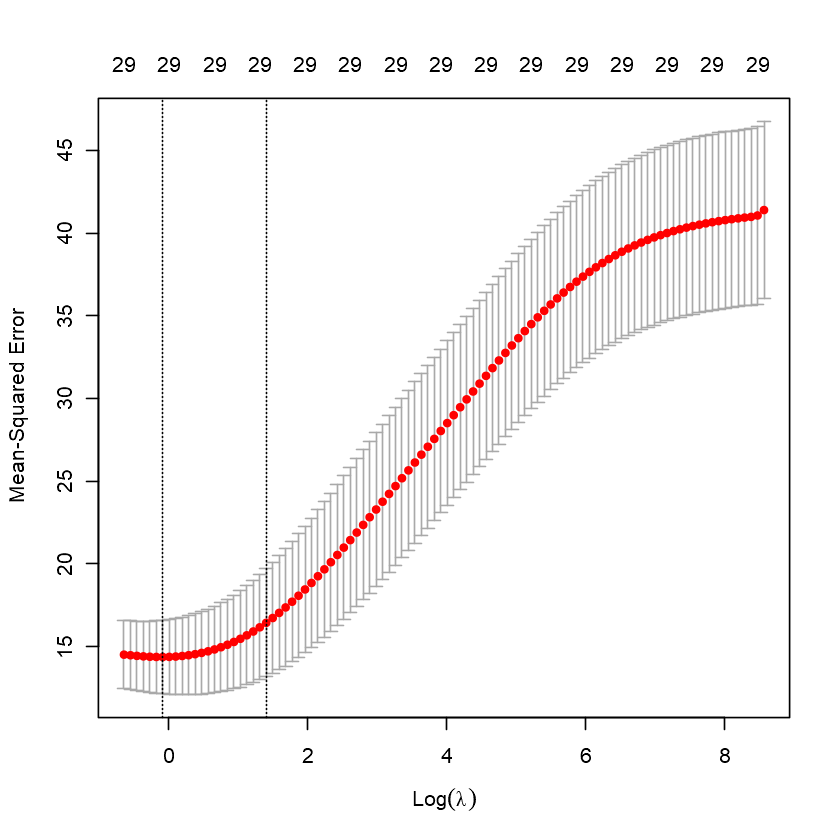

In [81]:
set.seed (200)
cv.out =cv.glmnet (x[train ,],y[train],alpha = 0)
plot(cv.out)
bestlam =cv.out$lambda.min
bestlam

Therefore, we see that the value of λ that results in the smallest crossvalidation error is 212. What is the test MSE associated with this value of λ?

In [82]:
ridge.pred=predict (ridge.mod ,s=bestlam ,newx=x[test ,])
mean(( ridge.pred -y.test)^2)

[1] 11.05044

This represents a further improvement over the test MSE that we got using λ = 4. Finally, we refit our ridge regression model on the full data set, using the value of λ chosen by cross-validation, and examine the coefficient
estimates.

In [83]:
out=glmnet (x, y, alpha =0)
predict (out, type= "coefficients" , s=bestlam )[1:20 ,]

(Intercept)       Ball_Control          Dribbling            Marking 
      22.870437037        0.021969193       -0.008472368        0.010746417 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
      -0.019648503       -0.006369474        0.003150899        0.411708115 
Attacking_Position      Interceptions             Vision          Composure 
      -0.026012340        0.004959967       -0.006329246        0.069499057 
          Crossing         Short_Pass          Long_Pass       Acceleration 
       0.039689630        0.053079043        0.022876526        0.019292683 
             Speed            Stamina           Strength            Balance 
       0.015881814       -0.037990935        0.110281102       -0.036582170

As expected, none of the coefficients are zero—ridge regression does not perform variable selection!

#### Lasso Regression
We saw that ridge regression with a wise choice of λ can outperform least squares as well as the null model on the Soccer data set. We now ask whether the lasso can yield either a more accurate or a more interpretable model than ridge regression. In order to fit a lasso model, we once again use the glmnet() function; however, this time we use the argument alpha=1. Other than that change, we proceed just as we did in fitting a ridge model.

Warning message in regularize.values(x, y, ties, missing(ties)):
"collapsing to unique 'x' values"


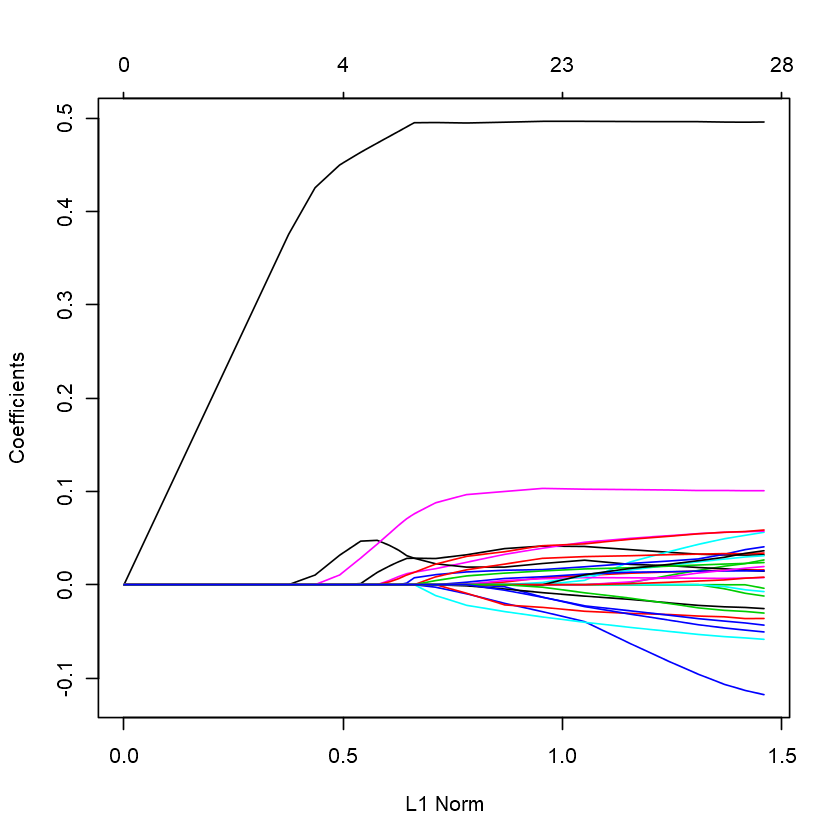

In [85]:
lasso.mod =glmnet (x[train ,],y[train],alpha =1, lambda =grid)
plot(lasso.mod)

We can see from the coefficient plot that depending on the choice of tuning parameter, some of the coefficients will be exactly equal to zero. We now perform cross-validation and compute the associated test error.

[1] 12.1076

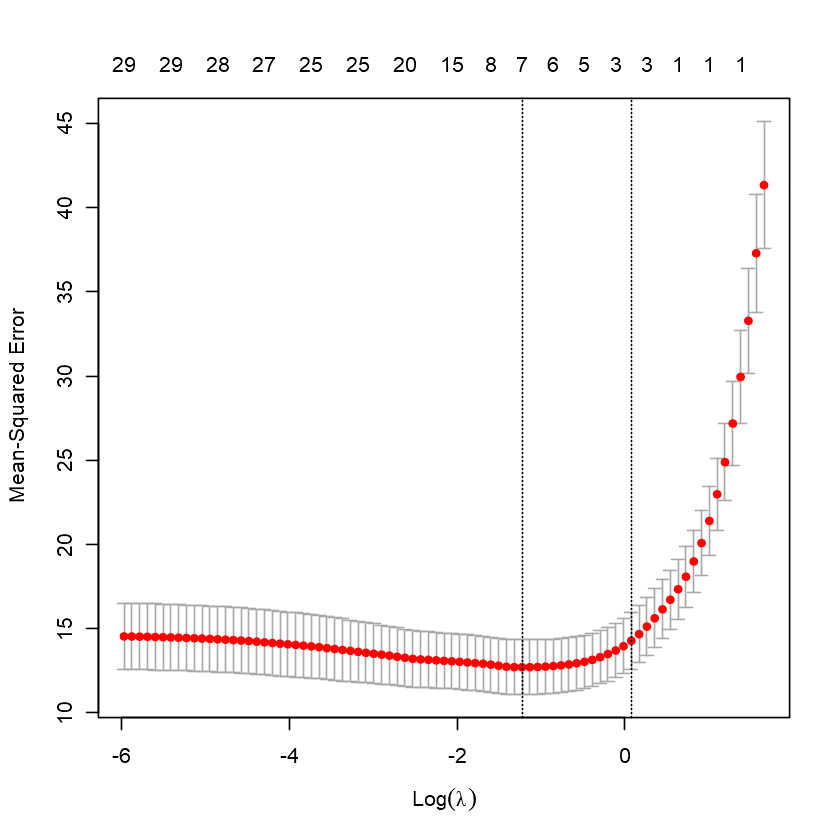

In [86]:
set.seed (1)
cv.out = cv.glmnet(x[train ,],y[train],alpha =1)
plot(cv.out)
bestlam = cv.out$lambda.min
lasso.pred=predict (lasso.mod, s=bestlam, newx=x[test ,])
mean((lasso.pred -y.test)^2)

This is substantially lower than the test set MSE of the null model and of least squares, and very similar to the test MSE of ridge regression with λ chosen by cross-validation. However, the lasso has a substantial advantage over ridge regression in that the resulting coefficient estimates are sparse. Here we see that 12 of the 19 coefficient estimates are exactly zero. So the lasso model with λ chosen by cross-validation contains only seven variables.

In [87]:
out=glmnet (x,y,alpha =1, lambda =grid)
lasso.coef= predict (out ,type ="coefficients",s=bestlam )[1:20 ,]
lasso.coef

(Intercept)       Ball_Control          Dribbling            Marking 
       22.72847142         0.00000000         0.00000000         0.00000000 
    Sliding_Tackle    Standing_Tackle         Aggression          Reactions 
        0.00000000         0.00000000         0.00000000         0.48052027 
Attacking_Position      Interceptions             Vision          Composure 
        0.00000000         0.00000000         0.00000000         0.04894994 
          Crossing         Short_Pass          Long_Pass       Acceleration 
        0.02288668         0.04620438         0.00000000         0.00000000 
             Speed            Stamina           Strength            Balance 
        0.00000000         0.00000000         0.10303562         0.00000000

# References